# Recognization with Bag of Visual Word

For this problem you will implement a basic image-based bag-of-words (BoW) model for a scene image dataset with 5 categories. You are encouraged to use any related packages, libraries, and functions for your implementation. We will not grade on your source code, so please provide figure outputs with detailed discussions/explanations. You are also required to report the classification accuracy (no need to over-tune the parameters for training/testing).

## Training/test data
    
The scene image database contain images of 5 categories: Coast, Forest, Highway, Mountain,
and Suburb.

    Train-10: This dataset consists of 10 images  5 categories = 50 images in total.
    Train-100: This dataset consists of 100 images  5 categories = 500 images in total.
    Test-100: This dataset consists of 100 images  5 categories = 500 images in total.

In [1]:
import os
import cv2

import numpy as np

from matplotlib import pyplot as plt
from skimage import io as image_io
from skimage import color as image_color
from scipy import io as sio

from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans

data_root = "../data/hw2_dataset/Problem3"
category = [  "Coast", "Forest", "Highway", "Mountain", "Suburb"]

os.listdir(data_root)

['test-100', 'train-10', 'train-100']

### (a)
Randomly pick an image from Train-10. Detect interest points and calculate
  
their descriptors for this image using SURF. Plot your interest point detection results
  
(e.g., image with the 30 most dominant interest points detected)

In [2]:
def choose_image(path):
    c = np.random.choice(category)
    data_cate_path = os.path.join(path , c)
    img_file = np.random.choice(os.listdir(data_cate_path))
    img_path = os.path.join( data_cate_path , img_file )
    return image_io.imread(img_path) , c
    
img_list = []
img_class = []
for i in range(5):
    img_info = choose_image(os.path.join( data_root , "train-10" )) 
    img_list.append(img_info[0])
    img_class.append(img_info[1])

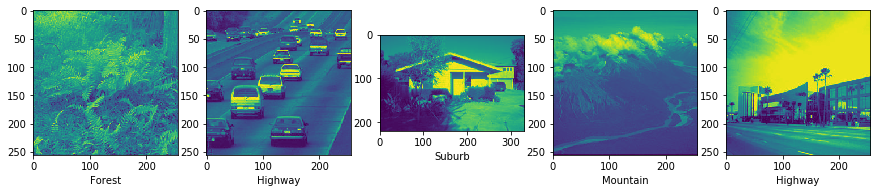

In [3]:
fig = plt.figure(figsize=(15,12))
for i in range(5):
    ax = fig.add_subplot( 1,5,i+1 )
    ax.imshow( img_list[i] )
    ax.set_xlabel( img_class[i] )
plt.show()

In [4]:
kps_list = []
descs_list = []
for img in img_list:
    surf = cv2.xfeatures2d.SURF_create()
    kps , descs = surf.detectAndCompute( img ,None)
    kps = np.array([  [ k.pt[0] , k.pt[1]  ] for k in kps  ] , dtype=int)
    kps_list.append(kps)
    descs_list.append(descs)
    print("#key points is ",len(kps))

#key points is  783
#key points is  479
#key points is  550
#key points is  241
#key points is  411


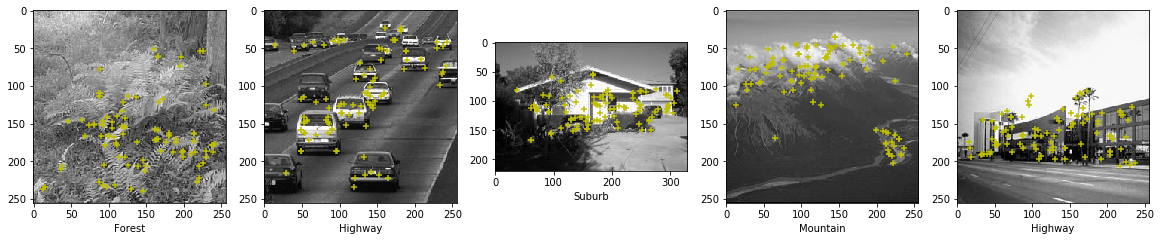

In [5]:
fig = plt.figure(figsize=(20,16))
for i , (img , kp , name) in enumerate(zip(img_list , kps_list , img_class)):
    ax = fig.add_subplot(1,5,i+1)
    ax.imshow( img , cmap="gray" )
    ax.scatter( kp[:,0][0:100] , kp[:,1][0:100] , marker="+" , c="y" , linewidths=1)
    ax.set_xlabel(name)
plt.savefig('3-a.png', bbox_inches='tight')
plt.show()

### (b)
Now you will learn a "dictionary" consisting of "visual words". Please extract
the detected interest points from all of the 50 images in Train-10, and stack them
into a N \* d matrix, where N denotes the total number of interest points and d is the
dimension of its descriptor. Use k-means algorithm to divide these interest points into
C clusters (you may simply choose C = 50 and maximum number of iterations = 5000
for simplicity). The centroid of each cluster then indicates a visual word.
Construct the 3-dimensional PCA subspace from the above N interest points. Randomly
select 6 clusters from the above results. Plot the visual words and the associated interest
points in this PCA subspace. Please use the same color to denote projected visual words
and interest points in your result.

In [6]:
img_list = []
img_class = []
train_10_path = os.path.join( data_root , "train-10" )
for p in os.listdir( train_10_path ):
    cate_path = os.path.join( train_10_path , p )
    for img_name in os.listdir( cate_path ):
        img_list.append( image_io.imread( os.path.join( cate_path , img_name ) ) )
        img_class.append(p)

print( "#image : " , len(img_list) )

train_class = os.listdir( train_10_path )

kps_list = []
descs_list = []
for img in img_list:
    surf = cv2.xfeatures2d.SURF_create()
    kps , descs = surf.detectAndCompute( img ,None)
    kps = np.array([  [ k.pt[0] , k.pt[1]  ] for k in kps  ] , dtype=int)
    kps_list.append(kps)
    descs_list.append(descs)
    print("#key points is ",len(kps) , "dimension of descs :" , descs.shape)

#image :  50
#key points is  653 dimension of descs : (653, 64)
#key points is  609 dimension of descs : (609, 64)
#key points is  726 dimension of descs : (726, 64)
#key points is  758 dimension of descs : (758, 64)
#key points is  783 dimension of descs : (783, 64)
#key points is  563 dimension of descs : (563, 64)
#key points is  421 dimension of descs : (421, 64)
#key points is  588 dimension of descs : (588, 64)
#key points is  837 dimension of descs : (837, 64)
#key points is  874 dimension of descs : (874, 64)
#key points is  603 dimension of descs : (603, 64)
#key points is  496 dimension of descs : (496, 64)
#key points is  632 dimension of descs : (632, 64)
#key points is  550 dimension of descs : (550, 64)
#key points is  558 dimension of descs : (558, 64)
#key points is  492 dimension of descs : (492, 64)
#key points is  495 dimension of descs : (495, 64)
#key points is  456 dimension of descs : (456, 64)
#key points is  557 dimension of descs : (557, 64)
#key points is  66

In [7]:
all_descs = []
for j in descs_list:
    all_descs.extend( j )
all_descs = np.array(all_descs)

km = KMeans(n_clusters=50 , max_iter=5000 , n_jobs=16)
descs_cluster = km.fit_predict( all_descs )

## 50 centroids
visual_word = km.cluster_centers_

X = all_descs - all_descs.mean(axis=0)

U,S,V = np.linalg.svd( X.T ,full_matrices=False)

reduction_d = X@U[:,0:3]

print( "Kmeans done" )

Kmeans done


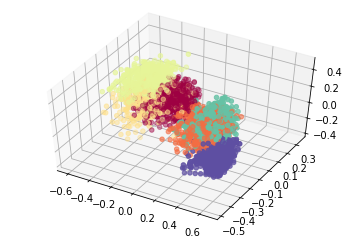

In [8]:
uni_index = np.random.choice(50,6)

choose_index = [ i in uni_index for i in descs_cluster ] 

new_cluster_index = np.zeros(shape=descs_cluster.shape)
for i , j in enumerate( descs_cluster ):
    for k in range(6):
        if j == uni_index[k]:
            new_cluster_index[i]=k
            break


from mpl_toolkits.mplot3d import Axes3D

new_cluster_index = np.array(new_cluster_index)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

s = ax.scatter( reduction_d[:,0][choose_index] , reduction_d[:,1][choose_index] , reduction_d[:,2][choose_index] 
           , c=new_cluster_index[choose_index] , cmap="Spectral" )
plt.savefig('3-b.png', bbox_inches='tight')
ax.view_init(elev=50,azim=None)
# fig.colorbar(s)

### (c)
With the derived dictionary of visual words, you can now represent each training
and test image as BoW features. When encoding the interest points into BoW, three
different strategies will be considered: Hard-Sum, Soft-Sum, and Soft-Max, as we
detail below.(See hw description)

In [9]:
test_img = []
train_10_path = os.path.join( data_root ,"train-10" )
for cat in category:
    cate_path = os.path.join( train_10_path , cat )
    file = np.random.choice( os.listdir( cate_path ) )
    test_img.append( image_io.imread( os.path.join(cate_path , file ) ) )

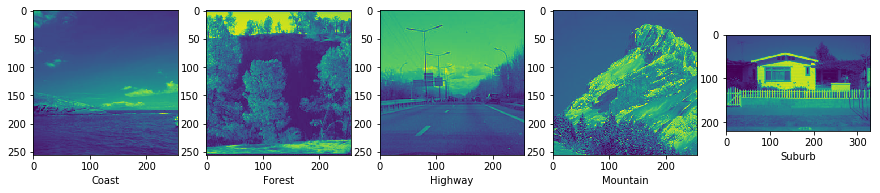

In [10]:
fig = plt.figure(figsize=(15,12))
for i in range(5):
    ax = fig.add_subplot( 1,5,i+1 )
    ax.imshow( test_img[i] )
    ax.set_xlabel( category[i] )
plt.show()

In [11]:
test_keys=[]
test_descs = []
for img in test_img:
    surf = cv2.xfeatures2d.SURF_create()
    kps , descs = surf.detectAndCompute(img,None)
    kps = np.array([  [ k.pt[0] , k.pt[1]  ] for k in kps  ] , dtype=int)
    test_keys.append(kps)
    test_descs.append(descs)    

In [12]:
def calculate_distance( x , centroid ):
    dis = np.sqrt(np.square(x-centroid).sum(axis=1))
    return dis.reshape(-1)

In [13]:
test_feature = []
for desc in test_descs:
    test_feature.append(np.apply_along_axis( calculate_distance , axis=1 , arr=desc ,centroid=visual_word))

In [14]:
visual_word.shape

(50, 64)

### Hard sum

In [17]:
def get_hard_sum_confidence( feature ):
    my_one = OneHotEncoder(50,sparse=False)
    HARD_SUM = np.argmin(feature,axis=1).reshape(-1,1)  ## Here is wrong.
    HARD_SUM = my_one.fit_transform(HARD_SUM)
    HARD_SUM = HARD_SUM.mean(axis=0)
    return HARD_SUM
# plt.bar( range(1,51) , HARD_SUM )

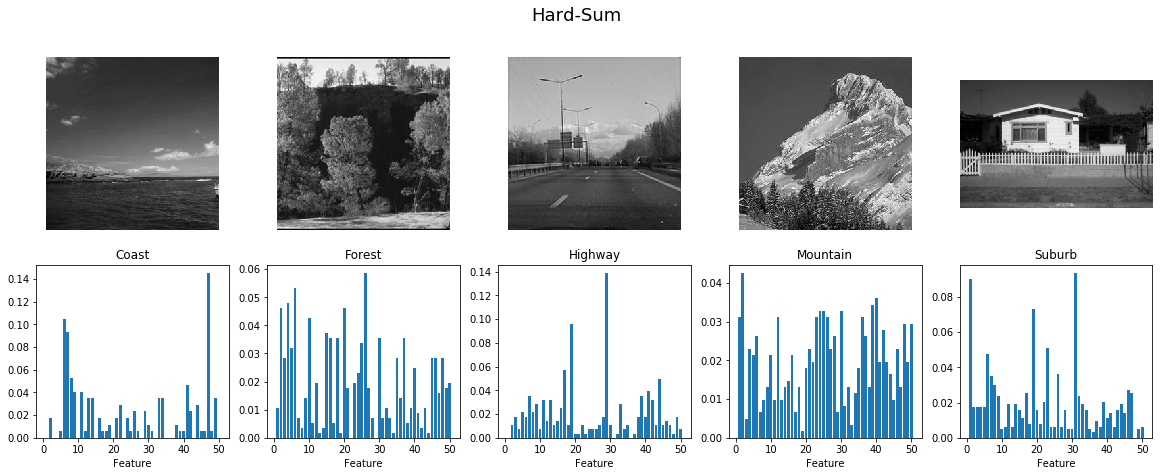

In [18]:
fig = plt.figure(figsize=(20,7))
plt.suptitle("Hard-Sum", fontsize=18)

for i , (img , fe , cl) in enumerate(zip( test_img , test_feature , category )):
    ax = fig.add_subplot( 2,5,i+1 )
    ax.imshow( img , cmap="gray" )
    
    ax.axis("off")
    ax = fig.add_subplot( 2,5,i+6 )
    ax.set_title(cl)
    ax.set_xlabel("Feature")
    ax.bar(range(1,51) , get_hard_sum_confidence( fe ) )

plt.savefig( "3-c.png" , bbox_inches='tight' )
plt.show()

### Soft sum

In [19]:
def get_soft_sum_confidence(feature):
    SOFT_SUM = feature/np.repeat(feature.sum(axis=1).reshape(feature.shape[0],1) , 50 , axis=1)
    SOFT_SUM = SOFT_SUM.mean(axis=0)
    return SOFT_SUM


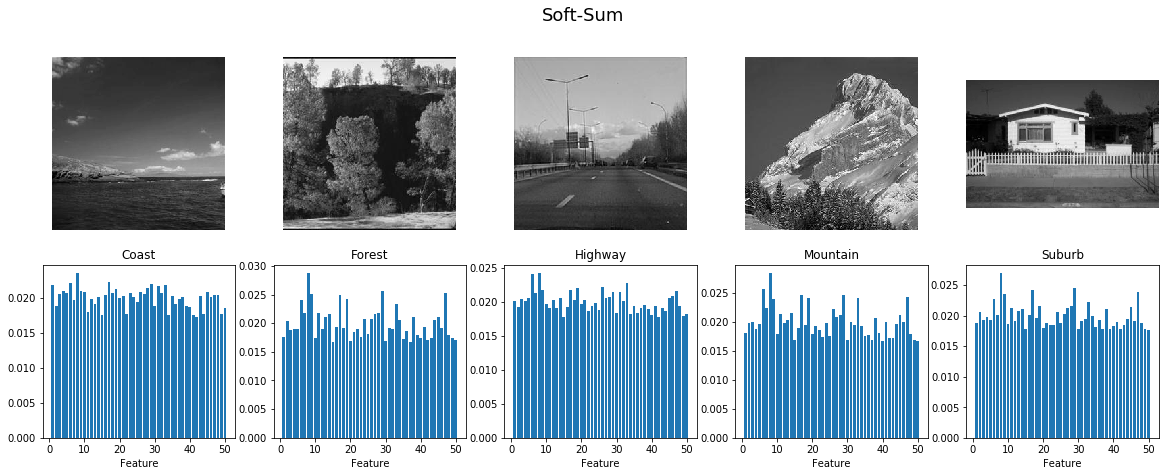

In [20]:
fig = plt.figure(figsize=(20,7))
plt.suptitle("Soft-Sum", fontsize=18)
for i , (img , fe , cl) in enumerate(zip( test_img , test_feature , category )):
    ax = fig.add_subplot( 2,5,i+1 )
    ax.imshow( img , cmap="gray" )
    ax.axis("off")
    ax = fig.add_subplot( 2,5,i+6 )
    ax.set_title(cl)
    ax.set_xlabel("Feature")
    ax.bar(range(1,51) , get_soft_sum_confidence( fe ) )
    
plt.savefig( "3-c-Soft-Sum.png" , bbox_inches='tight' )
plt.show()

### Soft max

In [21]:
def get_soft_max_confidence( feature ):
    SOFT_MAX = feature/np.repeat(feature.sum(axis=1).reshape(feature.shape[0],1) , 50 , axis=1)
    SOFT_MAX = SOFT_MAX.max(axis=0)
    return SOFT_MAX

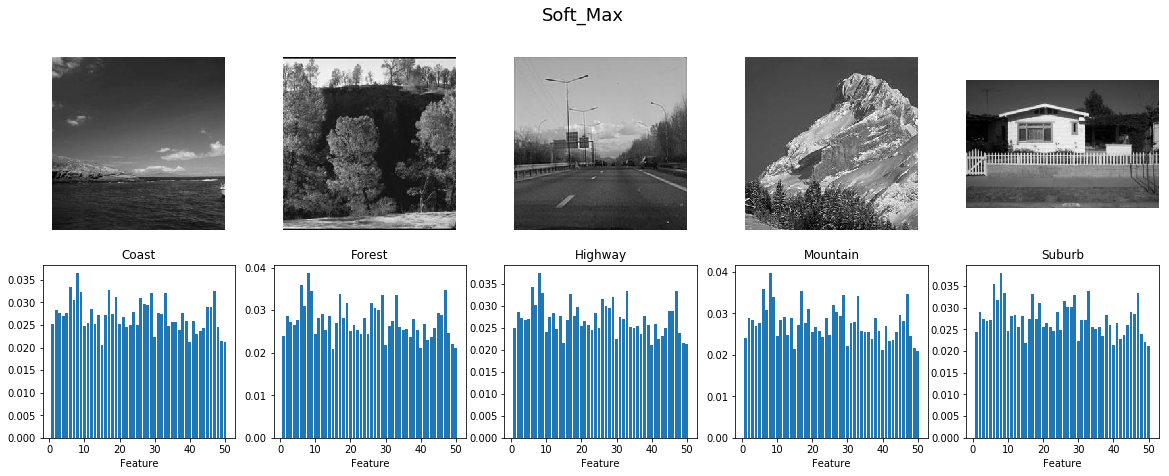

In [22]:
fig = plt.figure(figsize=(20,7))
plt.suptitle("Soft_Max", fontsize=18)

for i , (img , fe , cl) in enumerate(zip( test_img , test_feature , category )):
    ax = fig.add_subplot( 2,5,i+1 )
    ax.imshow( img , cmap="gray" )
    ax.axis("off")
    ax = fig.add_subplot( 2,5,i+6 )
    ax.set_title(cl)
    ax.set_xlabel("Feature")
    ax.bar(range(1,51) , get_soft_max_confidence( fe ) )
    
plt.savefig( "3-c-Soft-Max.png" , bbox_inches='tight' )
plt.show()

### (d)
Finally, We adopt the k-nearest neighbors classier (k-NN) to perform classifica-
tion using the above BoW features.
  
(i) Use Train-10 as the training data and Test-100 for testing (you may choose k = 5
for simplicity). Report the classification accuracy using Hard-Sum, Soft-Sum, and
Soft-Max. Are the results as expected (based on your observation on different BoW
features in (c))? If not, why?
  

In [23]:
## use knn to cluster train img

from sklearn.neighbors import KNeighborsClassifier as KNN

In [24]:
## calculate feature on all train-10 image
all_feature = {"HS":[] , "SS":[] , "SM":[]}
each_cat = []
for i in range(5):
    each_cat.extend([train_class[i]]*10)


for img_descs in descs_list:
    conf = np.apply_along_axis( calculate_distance , axis=1 , arr=img_descs ,centroid=visual_word)
    all_feature["HS"].append( get_hard_sum_confidence(conf))
    all_feature["SS"].append( get_soft_sum_confidence(conf))
    all_feature["SM"].append( get_soft_max_confidence(conf))
        

In [25]:
def experiment_acc(method , all_feature , visual_word , n_cluster=5):
    if method == "HS":
        print( "Use Hard-Sum to calculate confidence. " )
        feature_fuc = get_hard_sum_confidence
    if method == "SS":
        print( "Use Soft-Sum to calculate confidence. " )
        feature_fuc = get_soft_sum_confidence
    if method == "SM":
        print( "Use Soft-Max to calculate confidence. " )
        feature_fuc = get_soft_max_confidence
    
    clf = KNN(n_neighbors=n_cluster , n_jobs=4 , weights="distance")
    clf.fit(all_feature[method] , each_cat)

    test_100_path = os.path.join( data_root , "test-100" )
    surf = cv2.xfeatures2d.SURF_create()
    for cat in category:
        cate_path = os.path.join( test_100_path , cat )
        confidence_arr = []
        for file in os.listdir( cate_path ):
            img = image_io.imread( os.path.join( cate_path , file ) )
            kps , descs = surf.detectAndCompute(img , None)
            conf = np.apply_along_axis( calculate_distance , axis=1 , arr=descs ,centroid=visual_word)
            confidence_arr.append( feature_fuc(conf) )
        predict = clf.predict(confidence_arr)
        print( "class : {0:8s}".format(cat) , " acc : " , np.mean( predict == cat ) )

In [26]:
experiment_acc("HS" , all_feature , visual_word)

Use Hard-Sum to calculate confidence. 
class : Coast     acc :  0.27
class : Forest    acc :  0.9
class : Highway   acc :  0.44
class : Mountain  acc :  0.5
class : Suburb    acc :  0.9


In [36]:
experiment_acc("SS" , all_feature , visual_word)

Use Soft-Sum to calculate confidence. 
class : Coast     acc :  0.37
class : Forest    acc :  0.92
class : Highway   acc :  0.44
class : Mountain  acc :  0.35
class : Suburb    acc :  0.69


In [37]:
experiment_acc("SM" , all_feature , visual_word)

Use Soft-Max to calculate confidence. 
class : Coast     acc :  0.41
class : Forest    acc :  0.77
class : Highway   acc :  0.51
class : Mountain  acc :  0.6
class : Suburb    acc :  0.42


### (d)

(ii) Repeat (a) to (c) using Train-100 as the training data. Do you observe improved
classification results? Note that you might need to adjust parameters (e.g., the number
C of clusters as visual words, maximum number of iterations, and the number of k nea-
rest neighbors in k-NN, etc.) for this experiment. Please report and explain your results.

In [27]:
img_list = []
img_class = []
train_100_path = os.path.join( data_root , "train-100" )
for p in os.listdir( train_100_path ):
    cate_path = os.path.join( train_100_path , p )
    for img_name in os.listdir( cate_path ):
        img_list.append( image_io.imread( os.path.join( cate_path , img_name ) ) )
        img_class.append(p)

print( "#image : " , len(img_list) )

train_class = os.listdir( train_10_path )

kps_list = []
descs_list = []
for img in img_list:
    surf = cv2.xfeatures2d.SURF_create()
    kps , descs = surf.detectAndCompute( img ,None)
    kps = np.array([  [ k.pt[0] , k.pt[1]  ] for k in kps  ] , dtype=int)
    kps_list.append(kps)
    descs_list.append(descs)
#     print("#key points is ",len(kps) , "dimension of descs :" , descs.shape)

#image :  500


In [28]:
all_descs = []
for j in descs_list:
    all_descs.extend( j )
all_descs = np.array(all_descs)

km = KMeans(n_clusters=50 , max_iter=5000 , n_jobs=16)
print( "Hyperparameter of Kmeans : " , km , "\n")
descs_cluster = km.fit_predict( all_descs )

## 50 centroids
visual_word = km.cluster_centers_

X = all_descs - all_descs.mean(axis=0)

U,S,V = np.linalg.svd( X.T ,full_matrices=False)

reduction_d = X@U[:,0:3]

print( "Shape of visual_word : " , visual_word.shape,"\n")
print( "Kmeans done" )

Hyperparameter of Kmeans :  KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=5000,
    n_clusters=50, n_init=10, n_jobs=16, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0) 

Shape of visual_word :  (50, 64) 

Kmeans done


In [29]:
uni_index = np.random.choice(50,6)

choose_index = [ i in uni_index for i in descs_cluster ] 

new_cluster_index = np.zeros(shape=descs_cluster.shape)
for i , j in enumerate( descs_cluster ):
    for k in range(6):
        if j == uni_index[k]:
            new_cluster_index[i]=k
            break


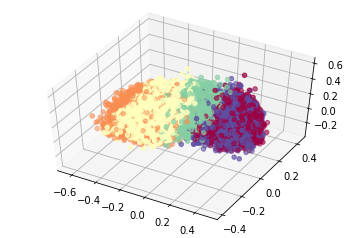

In [30]:
from mpl_toolkits.mplot3d import Axes3D

new_cluster_index = np.array(new_cluster_index)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

s = ax.scatter( reduction_d[:,0][choose_index] , reduction_d[:,1][choose_index] , reduction_d[:,2][choose_index] 
           , c=new_cluster_index[choose_index] , cmap="Spectral" )
ax.view_init(elev=50,azim=None)
plt.savefig('3-d-reduction.png', bbox_inches='tight')
# fig.colorbar(s)

In [31]:
## calculate feature on all train-10 image
all_feature = {"HS":[] , "SS":[] , "SM":[]}
each_cat = []
for i in range(5):
    each_cat.extend([train_class[i]]*100)


for img_descs in descs_list:
    conf = np.apply_along_axis( calculate_distance , axis=1 , arr=img_descs ,centroid=visual_word)
    all_feature["HS"].append( get_hard_sum_confidence(conf))
    all_feature["SS"].append( get_soft_sum_confidence(conf))
    all_feature["SM"].append( get_soft_max_confidence(conf))

In [32]:
experiment_acc("HS" , all_feature , visual_word , n_cluster=5)

Use Hard-Sum to calculate confidence. 
class : Coast     acc :  0.39
class : Forest    acc :  0.93
class : Highway   acc :  0.53
class : Mountain  acc :  0.56
class : Suburb    acc :  0.98


In [33]:
experiment_acc("HS" , all_feature , visual_word , n_cluster=10)

Use Hard-Sum to calculate confidence. 
class : Coast     acc :  0.36
class : Forest    acc :  0.94
class : Highway   acc :  0.58
class : Mountain  acc :  0.56
class : Suburb    acc :  1.0


In [45]:
experiment_acc("SS" , all_feature , visual_word , n_cluster=5 )

Use Soft-Sum to calculate confidence. 
class : Coast     acc :  0.4
class : Forest    acc :  0.96
class : Highway   acc :  0.66
class : Mountain  acc :  0.5
class : Suburb    acc :  0.8


In [46]:
experiment_acc("SS" , all_feature , visual_word , n_cluster=10 )

Use Soft-Sum to calculate confidence. 
class : Coast     acc :  0.35
class : Forest    acc :  0.94
class : Highway   acc :  0.66
class : Mountain  acc :  0.51
class : Suburb    acc :  0.86


In [47]:
experiment_acc("SM" , all_feature , visual_word , n_cluster=5)

Use Soft-Max to calculate confidence. 
class : Coast     acc :  0.36
class : Forest    acc :  0.88
class : Highway   acc :  0.56
class : Mountain  acc :  0.52
class : Suburb    acc :  0.83


In [48]:
experiment_acc("SM" , all_feature , visual_word , n_cluster=10)

Use Soft-Max to calculate confidence. 
class : Coast     acc :  0.35
class : Forest    acc :  0.89
class : Highway   acc :  0.63
class : Mountain  acc :  0.5
class : Suburb    acc :  0.83
